In [2]:
import pandas as pd
import numpy as np
X_train = np.loadtxt("data/train.txt")
y_train = np.loadtxt("data/train_labels.txt")
 
X_test = np.loadtxt("data/test.txt")
y_test = np.loadtxt("data/test_labels.txt")
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
X.shape

(10299, 561)

In [3]:
len(np.unique(y))

6

In [4]:
from sklearn import preprocessing
#определяем скейлер
scaler = preprocessing.StandardScaler()
#масштабируем данные
X_scaled = scaler.fit_transform(X)
#выводим нужное значение
X_scaled[0][0]

0.2105338541767611

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics
#проходимся циклом по всем нужным нам значениям количества кластеров
for i in range(2,10):
	# обучаем модель k-means с текущим количеством кластеров
    km = KMeans(n_clusters = i , random_state = 42 ).fit(X_scaled)
	#предсказываем метки
    y_pred = km.labels_
	#выводим результат для коэффициента силуэта
    print (i, metrics.silhouette_score(X_scaled,  y_pred))
for i in range(2,10):
    km = KMeans(n_clusters = i , random_state = 42 ).fit(X_scaled)
    y_pred= km.labels_
    print (i, metrics.calinski_harabasz_score(X_scaled,y_pred))
for i in range(2,10):
    km = KMeans(n_clusters = i , random_state = 42 ).fit(X_scaled)
    y_pred = km.labels_
    print (i, metrics.davies_bouldin_score(X_scaled, y_pred))

2 0.39373247640770803
3 0.3165174060752722
4 0.27826450266863173
5 0.25967188010717684
6 0.11706978147952803
7 0.10120866778714624
8 0.09199222994561511
9 0.08267046481294246
2 7880.813903657111
3 5034.470017849821
4 3668.0173727083115
5 2845.838894164787
6 2504.6858590869924
7 2171.068983512932
8 1890.8900519769945
9 1685.013483142379
2 1.0707441822385657
3 1.7838205288134947
4 2.0464376750898374
5 2.266485003212644
6 2.52599900702495
7 2.6502858155881905
8 2.619035633846788
9 2.7593862241965246


In [8]:
#определяем модель k-means
model= KMeans(n_clusters=6, init='random', random_state=42)
#обучаем модель
model.fit(X_scaled)
#вычисляем значение однородности
print(metrics.homogeneity_score(y, model.labels_))
#вычисляем значение полноты
print(metrics.completeness_score(y, model.labels_))
#вычисляем значение скорректированного индекса Рэнда
print(metrics.adjusted_rand_score(y, model.labels_))

0.5406994702303469
0.5792825031740629
0.41962042580459846


In [9]:
#создаём таблицу сопряжённости
ct = pd.crosstab(y, model.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))

In [10]:
ct

,1,2,3,4,5,6
ходьба,741,897,0,0,84,0
подъём,297,1236,2,0,9,0
спуск,882,310,0,0,214,0
сидение,0,1,447,91,0,1238
стояние,0,0,560,0,0,1346
лежание,0,5,329,1556,0,54


In [12]:
#определяем модель k-means
km= KMeans(n_clusters=2, init='random', random_state=42)
#обучаем модель
km.fit(X_scaled)

ctable = pd.crosstab(y, km.labels_)
ctable.index = ['ходьба', 'подъём', 
                'спуск', 'сидение', 'стояние', 'лежание']
ctable.columns = list(range(1,3))

In [13]:
ctable

,1,2
ходьба,1722,0
подъём,1536,8
спуск,1406,0
сидение,3,1774
стояние,0,1906
лежание,12,1932


In [14]:
metrics.completeness_score(y, km.labels_)

0.9795305596996312

In [15]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=2).fit(X_scaled)
print("Completeness: %0.3f" % metrics.completeness_score(y, ag.labels_))

Completeness: 1.000


In [16]:
from sklearn.decomposition import PCA
A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])
 
df = pd.DataFrame(A)
df_std  = (df - df.mean()) / (df.std())
pca = PCA(n_components=0.9)
principalComponents = pca.fit_transform(df_std)

In [17]:
principalComponents

array([[ 1.61145254,  1.76368007, -0.01320928],
       [-2.08441051,  1.01724955,  0.24417084],
       [ 0.29568142, -0.95946326,  0.05272576],
       [ 0.50390826, -1.24373821,  0.50808763],
       [-0.3266317 , -0.57772816, -0.79177495]])

# 7. Снижение размерности. Практика

In [18]:
import pandas as pd
df = pd.read_csv('data/Country-data.csv')
df['life_expec'].max()

82.8

In [20]:
from sklearn import preprocessing
X = df.drop('country',axis =1)  
y = df['country']
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0][0]

1.2915323778422956

<Axes: >

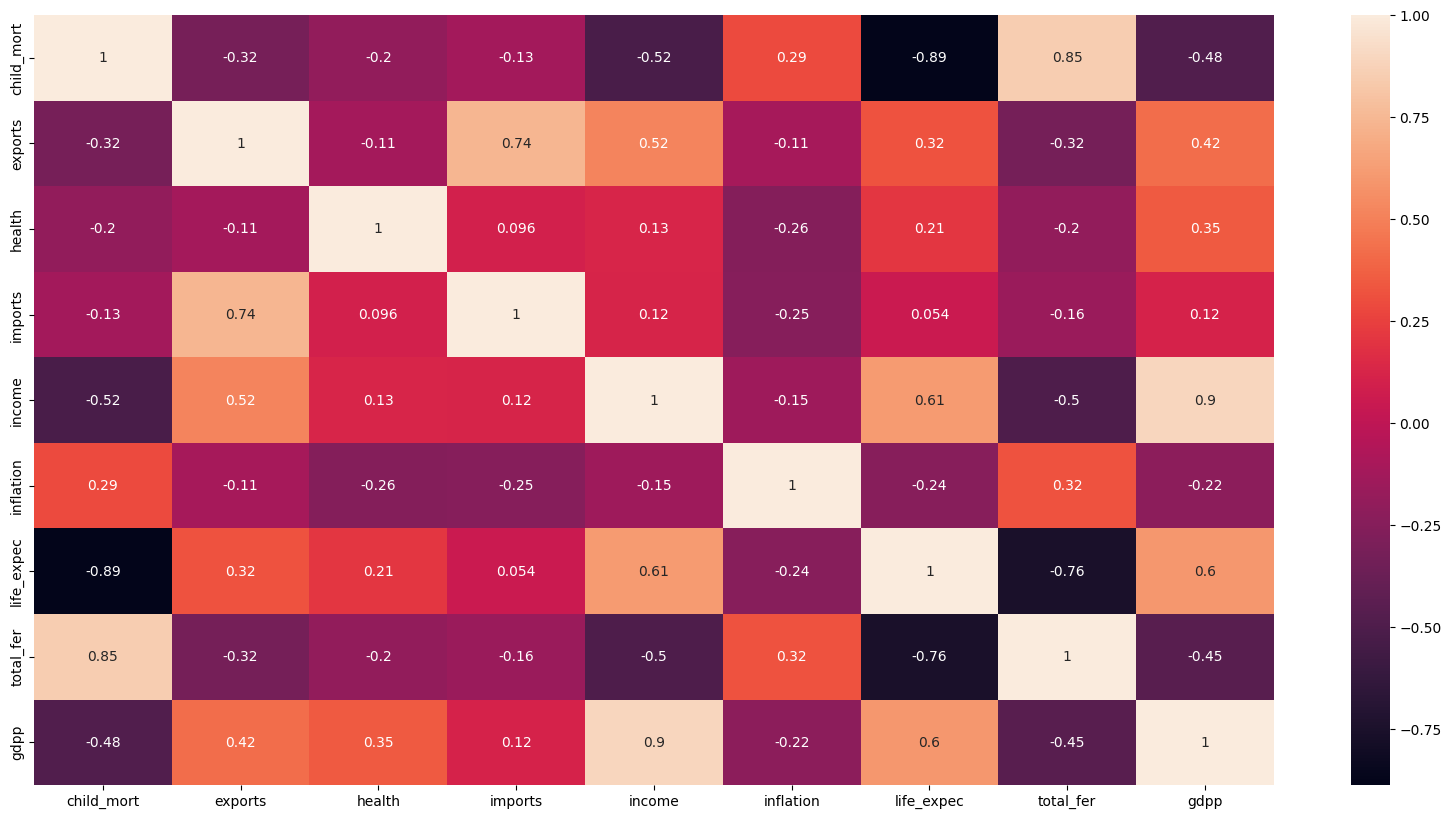

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

Теперь понизим размерность данных — возьмём для этого метод главных компонент (PCA) как самый простой и популярный.

Найдите минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных.

In [22]:
pca = PCA(n_components=0.9, random_state=42).fit(X_scaled)
len(pca.components_)

5

In [23]:
# Какую долю дисперсии объясняет первая главная компонента? Ответ округлите до двух знаков после точки-разделителя.
pca.explained_variance_ratio_[0]

0.45951739786095896

Как вы помните, при создании компонент с помощью PCA они должны получиться независимыми, то есть мы не должны теперь наблюдать высоких коэффициентов корреляции.

Постройте матрицу корреляций. Сколько значений в ней превышают , не считая единичных значений на главной диагонали?

<Axes: >

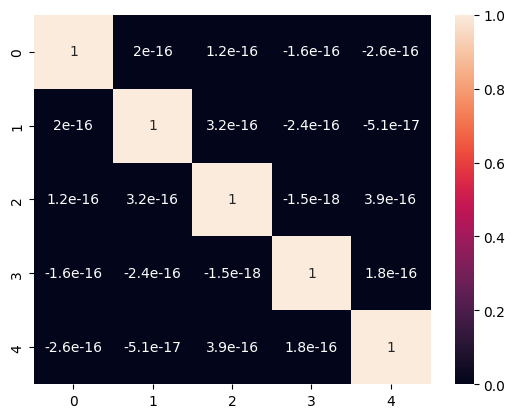

In [24]:
X_pca = pca.fit_transform(X_scaled)
corrmat = np.corrcoef(X_pca.transpose())
sns.heatmap(corrmat, annot=True)

Как видим, даже самый большой коэффициент корреляции практически неотличим от нуля — это значит, что мы всё сделали правильно, и теперь у нас есть пять независимых признаков, объясняющих до 90 % дисперсии.

Теперь, когда мы уменьшили размерность данных, можно переходить к кластеризации. Подберите оптимальное количество кластеров с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. Для кластеризации используйте алгоритм k-means++. В качестве значения параметра random_state возьмите число 1.

Судя по полученным результатам, сколько кластеров лучше всего взять?

In [26]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state = 1)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = metrics.silhouette_score(X_pca, cluster_labels)
    print(i, silhouette_avg)

2 0.2849396013378635
3 0.3079769786519013
4 0.32041373564415593
5 0.24796729244571458
6 0.23487112340554767
7 0.24412506184527263
8 0.2398550154102064
9 0.23319218781273082
10 0.2275942518842768


<Axes: xlabel='K-Means_Cluster_ID', ylabel='child_mort'>

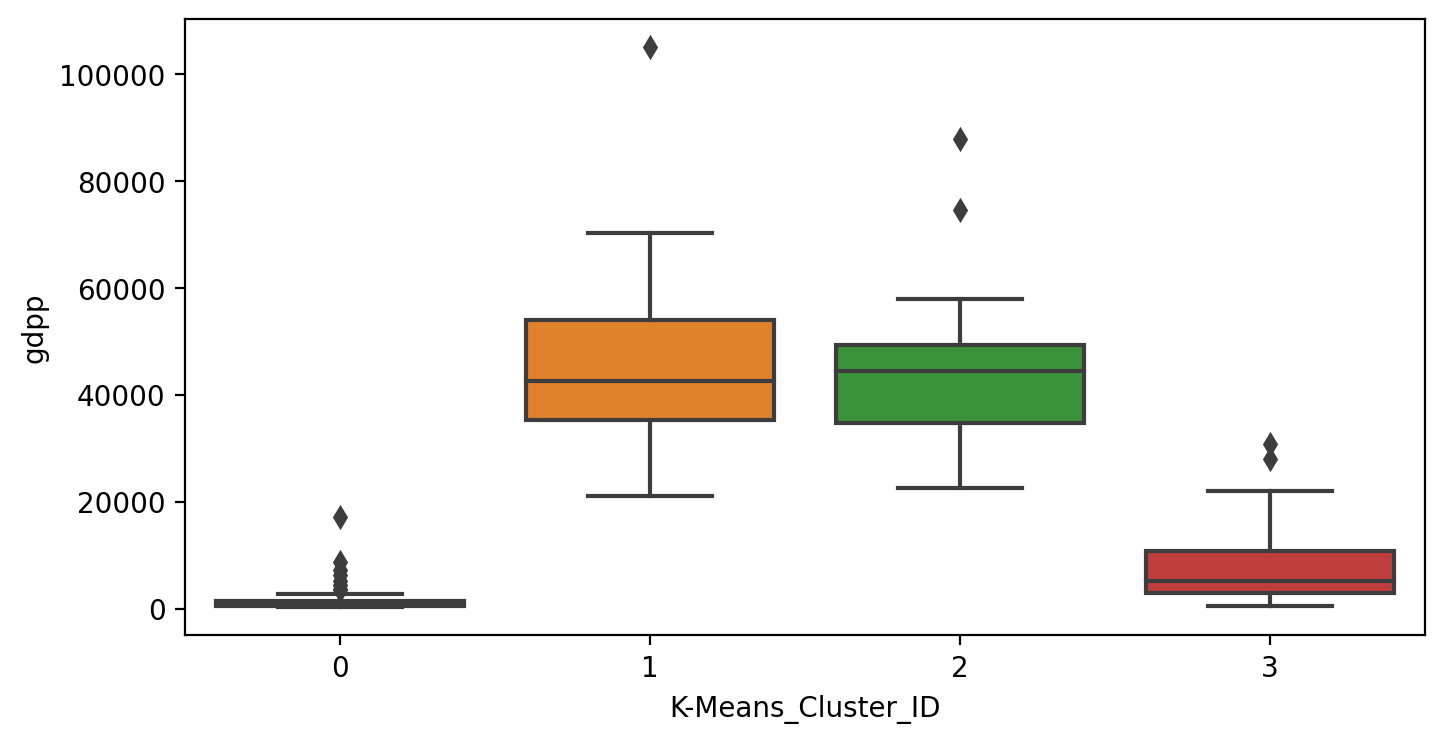

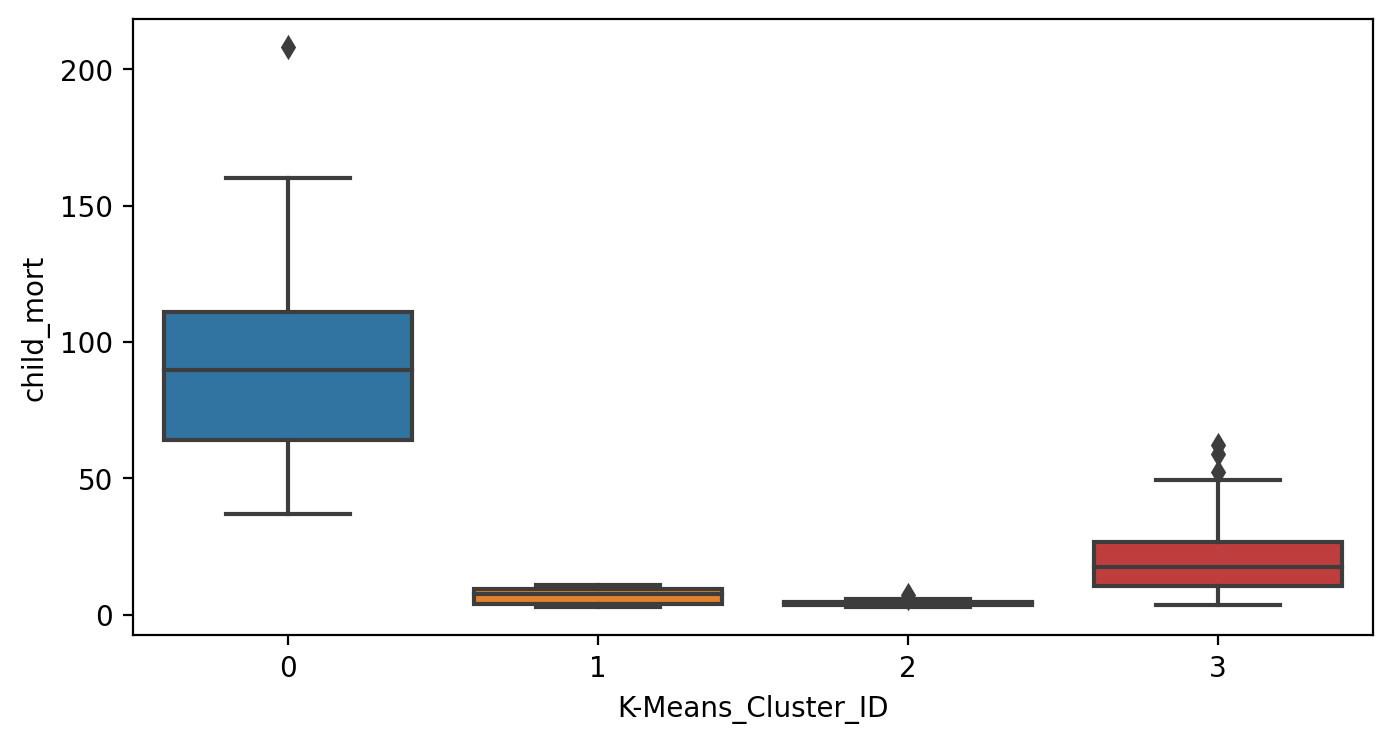

In [27]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X_pca)
df['K-Means_Cluster_ID'] = kmeans.labels_
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=df)
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=df)

In [29]:
K_Means_countries = df[df['K-Means_Cluster_ID'] == 0]
K_Means_countries.sort_values(by = 'life_expec')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
66,Haiti,208.0,15.300,6.91,64.7000,1500,5.450,32.1,3.33,662,0
87,Lesotho,99.7,39.400,11.10,101.0000,2380,4.150,46.5,3.30,1170,0
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,0
166,Zambia,83.1,37.000,5.89,30.9000,3280,14.000,52.0,5.40,1460,0
94,Malawi,90.5,22.800,6.59,34.9000,1030,12.100,53.1,5.31,459,0
137,South Africa,53.7,28.600,8.94,27.4000,12000,6.350,54.3,2.59,7280,0
106,Mozambique,101.0,31.500,5.21,46.2000,918,7.640,54.5,5.56,419,0
132,Sierra Leone,160.0,16.800,13.10,34.5000,1220,17.200,55.0,5.20,399,0
64,Guinea-Bissau,114.0,14.900,8.50,35.2000,1390,2.970,55.6,5.05,547,0
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,0
